Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [14]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [16]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [17]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [18]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [19]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [20]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
target_labels = 9
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

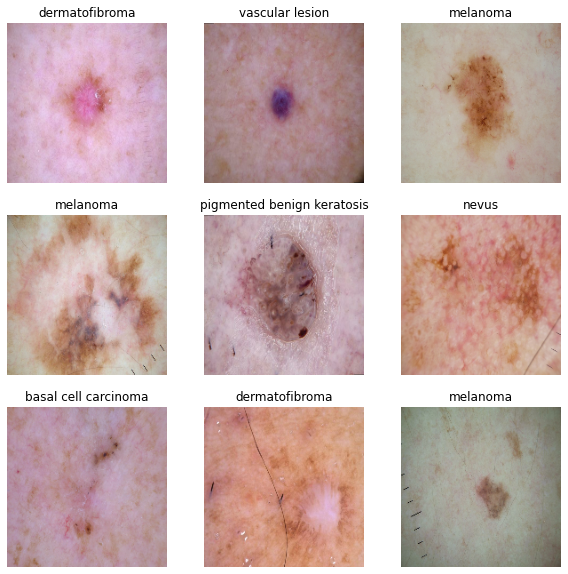

In [21]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
target_labels = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_2 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4

### Train the model

In [15]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2025-01-14 12:16:32.619548: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


56/56 [==============================] - 17s 80ms/step - loss: 6.0049 - accuracy: 0.3421 - val_loss: 2.2751 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4078 - accuracy: 0.5134 - val_loss: 2.5063 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1401 - accuracy: 0.5915 - val_loss: 2.7103 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.0193 - accuracy: 0.6373 - val_loss: 2.4169 - val_accuracy: 0.1633
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 0.8732 - accuracy: 0.6819 - val_loss: 2.0821 - val_accuracy: 0.2528
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 0.7411 - accuracy: 0.7316 - val_loss: 2.0004 - val_accuracy: 0.3356
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 0.6702 - accuracy: 0.7539 - val_loss: 1.8203 - val_accuracy: 0.3691
Epoch 8/20
56/56 [=====

### Visualizing training results

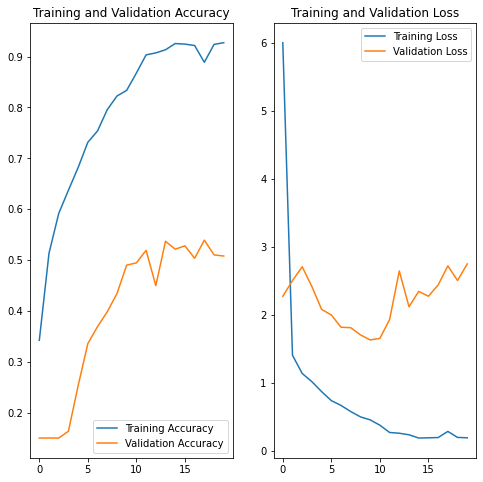

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Looks like the model is overfitting. The training accuracy is around 92%, but the validation accuracy is only 50%. The model is not doing well with unseen data.

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

augmented_images = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

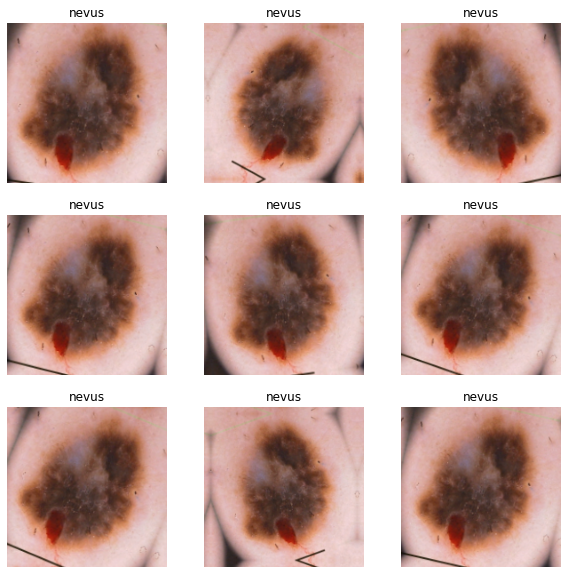

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image_list = augmented_images(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image_list[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  augmented_images,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])### Compiling the model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [27]:
%%time
##The above command is added to find out the training time of the model
## Your code goes here, note: train your model for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2025-01-14 16:47:36.763969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 77 of 1000
2025-01-14 16:47:46.723380: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 153 of 1000
2025-01-14 16:47:47.980982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.
2025-01-14 16:47:49.085986: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


169/169 [==============================] - 35s 62ms/step - loss: 2.5951 - accuracy: 0.2886 - val_loss: 2.1889 - val_accuracy: 0.1284
Epoch 2/20
169/169 [==============================] - 5s 29ms/step - loss: 1.6444 - accuracy: 0.3884 - val_loss: 1.9613 - val_accuracy: 0.2494
Epoch 3/20
169/169 [==============================] - 5s 28ms/step - loss: 1.5218 - accuracy: 0.4358 - val_loss: 1.5093 - val_accuracy: 0.4380
Epoch 4/20
169/169 [==============================] - 6s 35ms/step - loss: 1.4126 - accuracy: 0.4549 - val_loss: 1.4128 - val_accuracy: 0.4774
Epoch 5/20
169/169 [==============================] - 5s 27ms/step - loss: 1.3650 - accuracy: 0.4800 - val_loss: 1.6598 - val_accuracy: 0.3675
Epoch 6/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2941 - accuracy: 0.4994 - val_loss: 1.2532 - val_accuracy: 0.5019
Epoch 7/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2421 - accuracy: 0.5156 - val_loss: 1.5614 - val_accuracy: 0.4573
Epoch 8/2

### Visualizing the results

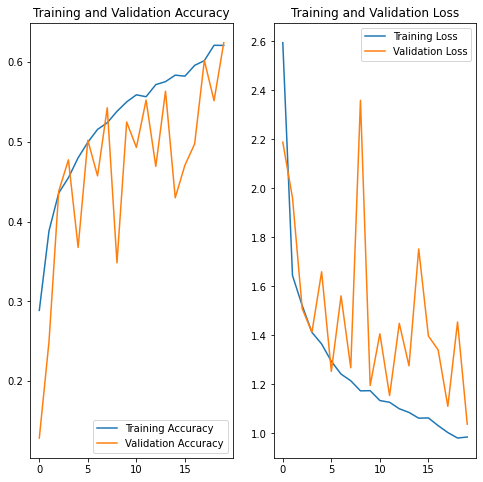

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Now the model is no longer overfitting. But, both the training and validation accuracies are low. The model is underfitting now

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [31]:
## Your code goes here.

from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
#path_list

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
#lesion_list

In [32]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [33]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [34]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

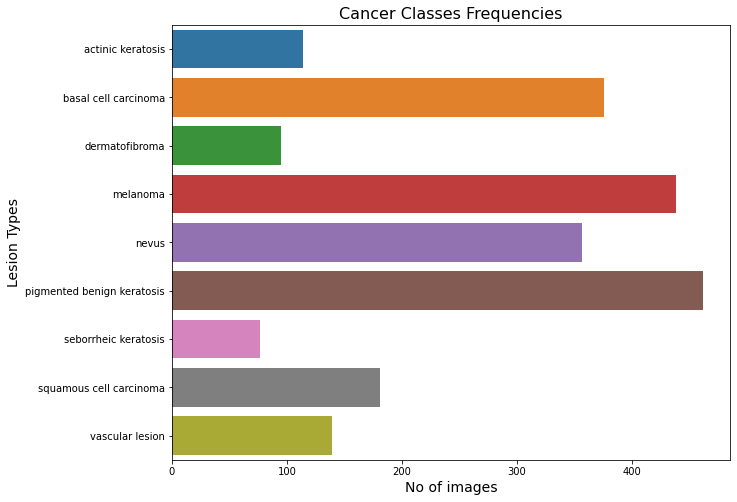

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=original_df)
plt.title('Cancer Classes Frequencies', fontsize=16)
plt.xlabel('No of images', fontsize=14)
plt.ylabel('Lesion Types', fontsize=14)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


- `Pigmented benign keratosis` has the highest number of samples
- The class `seborrheic keratosis` has the smallest proportion of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

  Using cached Augmentor-0.2.12-py2.py3-none-any.whl (38 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [39]:
path_to_training_dataset= str(data_dir_train)+'/'

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC62DD63940>: 100%|██████████| 500/500 [00:03<00:00, 150.97 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC62C59CE50>: 100%|██████████| 500/500 [00:03<00:00, 158.81 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC62C6BBD30>: 100%|██████████| 500/500 [00:03<00:00, 155.04 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FC62C67B400>: 100%|██████████| 500/500 [00:14<00:00, 34.42 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FC65937F280>: 100%|██████████| 500/500 [00:12<00:00, 41.56 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC6201A2460>: 100%|██████████| 500/500 [00:03<00:00, 154.66 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC6593E1A00>: 100%|██████████| 500/500 [00:06<00:00, 83.28 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC62CF7C9A0>: 100%|██████████| 500/500 [00:02<00:00, 170.68 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC659320AC0>: 100%|██████████| 500/500 [00:03<00:00, 152.98 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [40]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [43]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [44]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [45]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [47]:
# data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6740 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6740 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [49]:
## your code goes here

model = Sequential([
  augmented_images,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [50]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [51]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
# history = # your model fit code

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 14s 76ms/step - loss: 2.8990 - accuracy: 0.2240 - val_loss: 2.1969 - val_accuracy: 0.1402
Epoch 2/50
169/169 [==============================] - 14s 80ms/step - loss: 1.8473 - accuracy: 0.2797 - val_loss: 2.1478 - val_accuracy: 0.1528
Epoch 3/50
169/169 [==============================] - 13s 76ms/step - loss: 1.7872 - accuracy: 0.3236 - val_loss: 1.8123 - val_accuracy: 0.3093
Epoch 4/50
169/169 [==============================] - 11s 64ms/step - loss: 1.7561 - accuracy: 0.3259 - val_loss: 1.7093 - val_accuracy: 0.3190
Epoch 5/50
169/169 [==============================] - 13s 75ms/step - loss: 1.7006 - accuracy: 0.3435 - val_loss: 1.7664 - val_accuracy: 0.3145
Epoch 6/50
169/169 [==============================] - 13s 77ms/step - loss: 1.6774 - accuracy: 0.3416 - val_loss: 1.8765 - val_accuracy: 0.2864
Epoch 7/50
169/169 [==============================] - 13s 77ms/step - loss: 1.6576 - accuracy: 0.3514 - val_loss: 1.7141 - val_accuracy:

#### **Todo:**  Visualize the model results

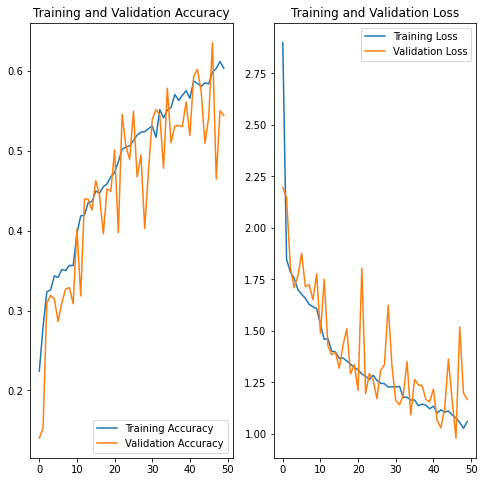

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Class rebalance did not help much on improving both the training & validation accuracies. Adding more layers

In [53]:
model = Sequential([
  augmented_images,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(64, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels, activation='softmax')
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
# history = # your model fit code

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 11s 54ms/step - loss: 2.3057 - accuracy: 0.2719 - val_loss: 2.3115 - val_accuracy: 0.1320
Epoch 2/50
169/169 [==============================] - 9s 53ms/step - loss: 1.6577 - accuracy: 0.3602 - val_loss: 2.2453 - val_accuracy: 0.1818
Epoch 3/50
169/169 [==============================] - 9s 52ms/step - loss: 1.5816 - accuracy: 0.3880 - val_loss: 1.8978 - val_accuracy: 0.2737
Epoch 4/50
169/169 [==============================] - 9s 53ms/step - loss: 1.5026 - accuracy: 0.4121 - val_loss: 1.3487 - val_accuracy: 0.4636
Epoch 5/50
169/169 [==============================] - 9s 51ms/step - loss: 1.4606 - accuracy: 0.4227 - val_loss: 1.7651 - val_accuracy: 0.3635
Epoch 6/50
169/169 [==============================] - 9s 51ms/step - loss: 1.4263 - accuracy: 0.4303 - val_loss: 1.9134 - val_accuracy: 0.3464
Epoch 7/50
169/169 [==============================] - 9s 53ms/step - loss: 1.3902 - accuracy: 0.4507 - val_loss: 1.5550 - val_accuracy: 0.3798
Epoch 8/5

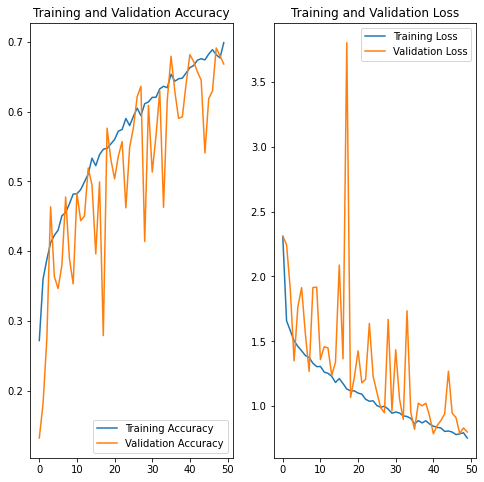

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training & validation accuracies are between 65 to 70%.

Adding regularisation techniques

In [67]:
model = Sequential([
  augmented_images,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.ActivityRegularization(l2=0.0001),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.ActivityRegularization(l2=0.0001),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.ActivityRegularization(l2=0.0001),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.ActivityRegularization(l2=0.0001),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(64, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
# history = # your model fit code

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 15s 79ms/step - loss: 12.0256 - accuracy: 0.2111 - val_loss: 5.0610 - val_accuracy: 0.1335
Epoch 2/50
169/169 [==============================] - 15s 84ms/step - loss: 2.9020 - accuracy: 0.2710 - val_loss: 4.2605 - val_accuracy: 0.1358
Epoch 3/50
169/169 [==============================] - 14s 79ms/step - loss: 2.2601 - accuracy: 0.2930 - val_loss: 2.4875 - val_accuracy: 0.1402
Epoch 4/50
169/169 [==============================] - 13s 74ms/step - loss: 1.9708 - accuracy: 0.3257 - val_loss: 3.5123 - val_accuracy: 0.1372
Epoch 5/50
169/169 [==============================] - 14s 78ms/step - loss: 1.8595 - accuracy: 0.3705 - val_loss: 3.8067 - val_accuracy: 0.2025
Epoch 6/50
169/169 [==============================] - 13s 74ms/step - loss: 1.7720 - accuracy: 0.3926 - val_loss: 7.0641 - val_accuracy: 0.1209
Epoch 7/50
169/169 [==============================] - 11s 65ms/step - loss: 1.6818 - accuracy: 0.4125 - val_loss: 3.3804 - val_accuracy

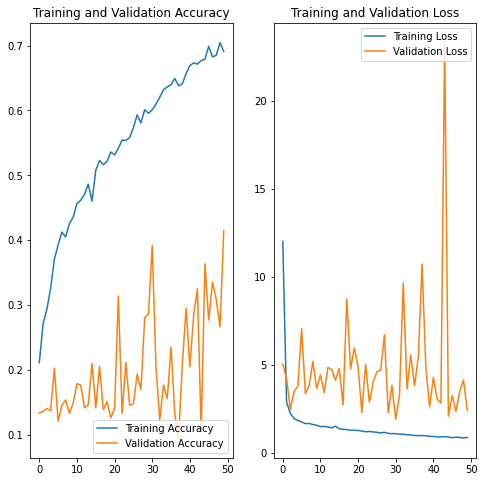

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After adding regularisation techniques, the validation accuracy is very less.
Removing regularisation techniques. Adding one more convolutional layer & FC layer

In [71]:
model = Sequential([
  augmented_images,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(64, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(32, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels, activation='softmax')
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
# history = # your model fit code

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 15s 81ms/step - loss: 1.9695 - accuracy: 0.2786 - val_loss: 2.4079 - val_accuracy: 0.1157
Epoch 2/50
169/169 [==============================] - 13s 75ms/step - loss: 1.6241 - accuracy: 0.3835 - val_loss: 2.0704 - val_accuracy: 0.1958
Epoch 3/50
169/169 [==============================] - 14s 78ms/step - loss: 1.5110 - accuracy: 0.4212 - val_loss: 1.3879 - val_accuracy: 0.4748
Epoch 4/50
169/169 [==============================] - 14s 81ms/step - loss: 1.4371 - accuracy: 0.4460 - val_loss: 1.5152 - val_accuracy: 0.4585
Epoch 5/50
169/169 [==============================] - 13s 72ms/step - loss: 1.3668 - accuracy: 0.4753 - val_loss: 1.4452 - val_accuracy: 0.4444
Epoch 6/50
169/169 [==============================] - 14s 81ms/step - loss: 1.3020 - accuracy: 0.4954 - val_loss: 1.4385 - val_accuracy: 0.4718
Epoch 7/50
169/169 [==============================] - 14s 79ms/step - loss: 1.2427 - accuracy: 0.5230 - val_loss: 1.5199 - val_accuracy:

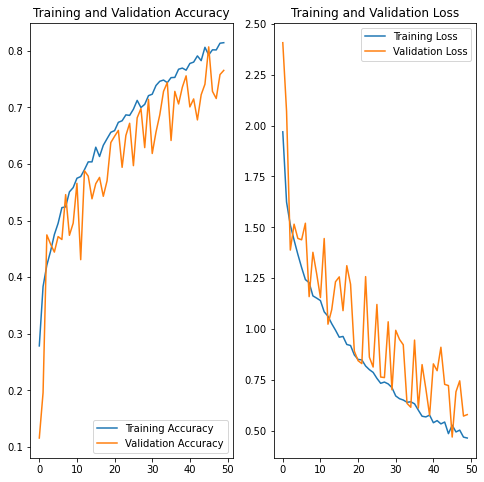

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model is neither overfitting nor underfitting now. The validation accuracy grows the training accuracy as seen from the above graph.

Model Prediction

Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


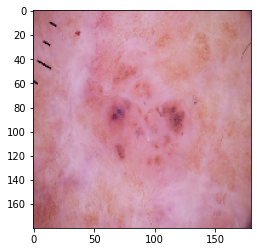

In [76]:
from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)